In [11]:
import pandas as pd
import numpy as np
import os
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
data_path = '/home/veeteque/InfoShare/Projekt_zczasem/LokalneProjekty/PythonStatystyka/DATA/'
os.chdir(data_path)

data_filename = 'Womens Clothing E-Commerce Reviews.csv'

DATA_SRC = pd.read_csv(data_path + data_filename, index_col = False)

In [13]:
DATA_SRC.drop(['Unnamed: 0', 'Clothing ID', 'Title', 'Review Text'], axis = 1, inplace = True)

DATA_SRC = pd.concat([DATA_SRC, pd.get_dummies(DATA_SRC['Division Name'], prefix = 'Div')], axis = 1)
DATA_SRC = pd.concat([DATA_SRC, pd.get_dummies(DATA_SRC['Department Name'], prefix = 'Dept')], axis = 1)
DATA_SRC = pd.concat([DATA_SRC, pd.get_dummies(DATA_SRC['Class Name'], prefix = 'Class')], axis = 1)

DATA_SRC.drop(['Division Name', 'Department Name', 'Class Name'], axis = 1, inplace = True)

DATA_SRC.dropna(inplace = True)

In [14]:
columnsDummies = ['Div_General', 'Div_General Petite', 'Div_Initmates', 'Dept_Bottoms',
       'Dept_Dresses', 'Dept_Intimate', 'Dept_Jackets', 'Dept_Tops',
       'Dept_Trend', 'Class_Blouses', 'Class_Casual bottoms', 'Class_Chemises',
       'Class_Dresses', 'Class_Fine gauge', 'Class_Intimates', 'Class_Jackets',
       'Class_Jeans', 'Class_Knits', 'Class_Layering', 'Class_Legwear',
       'Class_Lounge', 'Class_Outerwear', 'Class_Pants', 'Class_Shorts',
       'Class_Skirts', 'Class_Sleep', 'Class_Sweaters', 'Class_Swim',
       'Class_Trend']

columnsDummiesDiv = ['Div_General', 'Div_General Petite', 'Div_Initmates']
columnsDummiesDept = ['Dept_Dresses', 'Dept_Intimate', 'Dept_Jackets', 'Dept_Tops', 'Dept_Trend']
columnsDummiesClass = ['Class_Blouses', 'Class_Casual bottoms', 'Class_Chemises',
       'Class_Dresses', 'Class_Fine gauge', 'Class_Intimates', 'Class_Jackets',
       'Class_Jeans', 'Class_Knits', 'Class_Layering', 'Class_Legwear',
       'Class_Lounge', 'Class_Outerwear', 'Class_Pants', 'Class_Shorts',
       'Class_Skirts', 'Class_Sleep', 'Class_Sweaters', 'Class_Swim',
       'Class_Trend']

columnsSourceIntegers = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [15]:
chi_square_value, p_value=calculate_bartlett_sphericity(DATA_SRC)
chi_square_value, p_value

(nan, nan)

In [16]:
kmo_all, kmo_model=calculate_kmo(DATA_SRC[columnsDummiesDiv + columnsDummiesDept + columnsDummiesClass])
kmo_model

nan

In [7]:
fa = FactorAnalyzer()
fa.analyze(DATA_SRC, rotation=None)
ev, v = fa.get_eigenvalues()
#print(ev, v)

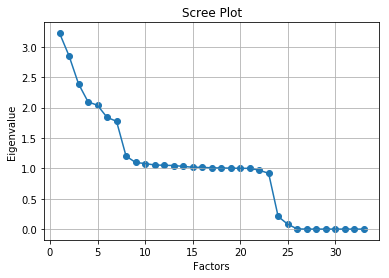

In [8]:
plt.scatter(range(1,DATA_SRC.shape[1]+1),ev)
plt.plot(range(1,DATA_SRC.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

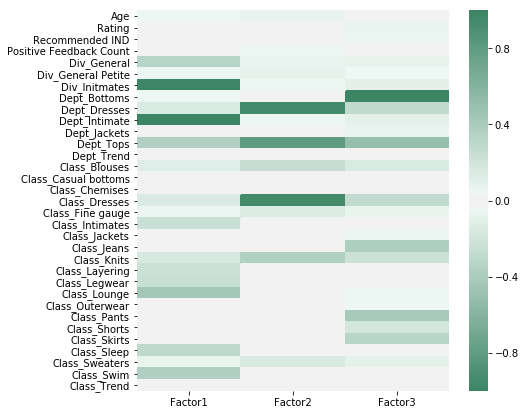

In [9]:
plt.figure(figsize = (7, 7))
sns.heatmap(fa.loadings, center=0, vmin = -1, vmax = 1, cmap = sns.diverging_palette(150, 150, as_cmap=True))
plt.show()